Задание 2  
Постройте модель предсказания ядовитости или съедобности гриба (атрибут class) по остальным атрибутам.  
а) Определите атрибут, по которому проще всего предсказать целевую переменную. Попробуйте построить модель без этого атрибута.  
б) Отранжируйте атрибуты по их предсказательной силе (если пытаться предсказать съедобность гриба исходя только из этого атрибута)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics, tree

np.random.seed(42)

In [2]:
df = pd.read_csv('C:/mushrooms.csv')
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

После того, как мы получили размер датафрейма (чтобы понимать, что к чему), и проверили на целостность данных (все поля заполнены), выведем общую статистику:

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Из этого будет интересно посмотреть на freq, т.е. частоту наиболее встречающегося признака

In [6]:
freq = df.describe().iloc[3]
freq.sort_values()

gill-color                  1728
cap-color                   2284
spore-print-color           2388
habitat                     3148
cap-surface                 3244
odor                        3528
cap-shape                   3656
stalk-root                  3776
ring-type                   3968
population                  4040
class                       4208
stalk-color-below-ring      4384
stalk-color-above-ring      4464
stalk-shape                 4608
bruises                     4748
stalk-surface-below-ring    4936
stalk-surface-above-ring    5176
gill-size                   5612
gill-spacing                6812
ring-number                 7488
gill-attachment             7914
veil-color                  7924
veil-type                   8124
Name: freq, dtype: object

В принципе, можно спокойно избавиться от признака veil-type, т.к. он не несёт в себе никакой смысловой нагрузки и практической значимости:

In [7]:
df['veil-type'].unique()

array(['p'], dtype=object)

Заменим текстовые метки искомого класса на бинарные:

In [8]:
y_values, y_names = pd.factorize(df['class'])

После чего удалим "class" из датафрейма и создадим много-много столбцов (всех признаков всех классов)

In [9]:
df = df.drop(columns=['class'])

In [10]:
df_dum = pd.get_dummies(df)
df_dum.head(5)

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


Разобъём датасет на три выборки:

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df_dum,y_values, shuffle=True, stratify=y_values, test_size=0.3)
X_valid, X_test, y_valid, y_test = train_test_split(X_test,y_test, shuffle=True, stratify=y_test, test_size=0.3)

Для тренировки модели будем использовать линейную регрессию:

In [12]:
log_reg = linear_model.LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [13]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [14]:
predict = log_reg.predict(X_valid)
print("Точность на валидационном наборе:", metrics.accuracy_score(y_valid, predict))
predict = log_reg.predict(X_test)
print("Точность на тестовом наборе:", metrics.accuracy_score(y_test, predict))

Точность на валидационном наборе: 1.0
Точность на тестовом наборе: 1.0


Из рубрики "Спойлер алерт": точность 1.0 достигается при хорошем тестовом наборе и удачном seed.  
Например, при разбиении train\test 0.3 и valid\test 0.5 на первом этапе точность на тестовом наборе будет не 1, а чуть поменьше (0.999).
Но ведь не единица!

Далее построим таблицу значимости атрибутов натренированной модели на основе тестовых данных.
Изначально анализ проводился на всём датасете, но условие не указывает, что именно должно являться исходным параметром.

In [15]:
from sklearn.inspection import permutation_importance
#result = permutation_importance(log_reg, df_dum, y_values, n_repeats=5, random_state=0)
result = permutation_importance(log_reg, X_test, y_test, n_repeats=5, random_state=42)

In [16]:
importance = result.importances_mean

In [17]:
df_res = pd.DataFrame({'col':df_dum.columns, 'value':importance})

In [18]:
df_res.sort_values(by=['value'], ascending=False).head(10)

,col,value
27,odor_n,0.022951
100,spore-print-color_r,0.004098
52,stalk-root_b,0.001093
0,cap-shape_b,0.000000
75,stalk-color-below-ring_e,0.000000
85,veil-color_w,0.000000
84,veil-color_o,0.000000
83,veil-color_n,0.000000
82,veil-type_p,0.000000
81,stalk-color-below-ring_y,0.000000


По таблице, очевидно, что явным признаком ~~Covid-19~~ модели является отсутствие запаха.  
И поэтому мы удаляем odor (не odor_n)

Для достижения теоретически правильного выполнения лабораторной опишем построение дерева.  
Оно здесь (в Jupyter) хуже применимо, т.к. всё наслаивается одно на другое,  
а использовать другие модули не очень и хочется

Можно не менять критерий при тренировке, но в контексте рассмотрения нами энтропии как показателя так будет лучше (наверное).

[Text(167.40000000000003, 190.26, 'odor_n <= 0.5\nentropy = 0.999\nsamples = 5686\nvalue = [2741, 2945]'),
 Text(66.96000000000001, 135.9, 'bruises_t <= 0.5\nentropy = 0.664\nsamples = 3207\nvalue = [2653, 554]'),
 Text(33.480000000000004, 81.53999999999999, 'entropy = 0.0\nsamples = 2277\nvalue = [2277, 0]'),
 Text(100.44000000000001, 81.53999999999999, 'stalk-root_c <= 0.5\nentropy = 0.973\nsamples = 930\nvalue = [376, 554]'),
 Text(66.96000000000001, 27.180000000000007, '\n  (...)  \n'),
 Text(133.92000000000002, 27.180000000000007, '\n  (...)  \n'),
 Text(267.84000000000003, 135.9, 'spore-print-color_r <= 0.5\nentropy = 0.221\nsamples = 2479\nvalue = [88, 2391]'),
 Text(234.36, 81.53999999999999, 'stalk-surface-below-ring_y <= 0.5\nentropy = 0.114\nsamples = 2428\nvalue = [37, 2391]'),
 Text(200.88000000000002, 27.180000000000007, '\n  (...)  \n'),
 Text(267.84000000000003, 27.180000000000007, '\n  (...)  \n'),
 Text(301.32000000000005, 81.53999999999999, 'entropy = 0.0\nsamples = 

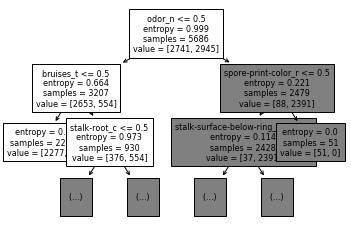

In [19]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf,feature_names=df_dum.columns, max_depth=2, fontsize=8) 

В дереве корневым признаком тоже является запах.  
Поэтому теперь точно его удаляем:

In [20]:
df = df.drop(columns=['odor'])

In [21]:
df_dum = pd.get_dummies(df)
df_dum.head(5)

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_dum,y_values, shuffle=True, stratify=y_values, test_size=0.3)
X_valid, X_test, y_valid, y_test = train_test_split(X_test,y_test, shuffle=True, stratify=y_test, test_size=0.3)

In [23]:
log_reg = linear_model.LogisticRegression(max_iter=1000) #а то ругается
log_reg.fit(X_train, y_train)
predict = log_reg.predict(X_valid)
print("Точность на валидационном наборе:", metrics.accuracy_score(y_valid, predict))
predict = log_reg.predict(X_test)
print("Точность на тестовом наборе:", metrics.accuracy_score(y_test, predict))

Точность на валидационном наборе: 0.9988276670574443
Точность на тестовом наборе: 0.9972677595628415


In [24]:
#result = permutation_importance(log_reg, df_dum, y_values, n_repeats=5, random_state=42)
result = permutation_importance(log_reg, X_test, y_test, n_repeats=5, random_state=42)
importance = result.importances_mean
df_res = pd.DataFrame({'col':df_dum.columns, 'value':importance})
sorted_vals = df_res.sort_values(by=['value'], ascending=False).head(10)
sorted_vals

,col,value
28,gill-color_b,0.051639
43,stalk-root_b,0.039071
26,gill-size_b,0.021311
27,gill-size_n,0.021311
87,spore-print-color_h,0.013115
48,stalk-surface-above-ring_k,0.007923
91,spore-print-color_r,0.005464
41,stalk-shape_t,0.005464
40,stalk-shape_e,0.005464
49,stalk-surface-above-ring_s,0.004918


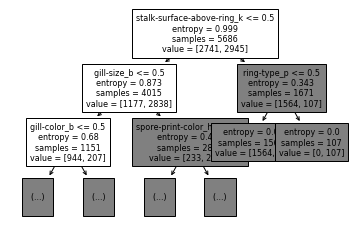

In [25]:
clf_2 = tree.DecisionTreeClassifier(criterion='entropy')
clf_2 = clf_2.fit(X_train, y_train)
tr = tree.plot_tree(clf_2,max_depth=2, fontsize=8, feature_names=df_dum.columns) 

Здесь можно выдвинуть очередную гипотезу:    
Дело в том, что сейчас мы фактически получили два признака, которые можно удалить в контексте самых влияющих на модель.  
Поэтому сделаем следующее: для каждого из случаев будем удалять признаки, пока точность не уйдёт ниже отметки 0.9
Важное замечание: на этот раз, ради эксперимента, построение дерева будет по всему(!) датасету. Причина простая: гипотетически, мы не знаем, какой объём датасета будет на каждом из шагов. Из этого следует, что у нас может быть очень маленькая тестовая выборка, со всеми вытекающими отсюда последствиями

In [26]:
predict_global = 1
df = pd.read_csv('C:/mushrooms.csv')
y_values, y_names = pd.factorize(df['class'])
df = df.drop(columns=['class'])
df = df.drop(columns=['odor'])

last_class = None

Точность на валидационном наборе: 0.9988276670574443
Точность на тестовом наборе: 1.0
Удаляется stalk-surface-below-ring
Точность на валидационном наборе: 0.9958968347010551
Точность на тестовом наборе: 0.9986338797814208
Удаляется stalk-surface-above-ring
Точность на валидационном наборе: 0.9964830011723329
Точность на тестовом наборе: 0.9972677595628415
Удаляется gill-color
Точность на валидационном наборе: 0.9906213364595545
Точность на тестовом наборе: 0.9918032786885246
Удаляется gill-size
Точность на валидационном наборе: 0.9912075029308324
Точность на тестовом наборе: 0.9931693989071039
Удаляется spore-print-color
Точность на валидационном наборе: 0.9900351699882767
Точность на тестовом наборе: 0.9904371584699454
Удаляется ring-type
Точность на валидационном наборе: 0.9835873388042204
Точность на тестовом наборе: 0.9849726775956285
Удаляется bruises
Точность на валидационном наборе: 0.9841735052754983
Точность на тестовом наборе: 0.98224043715847
Удаляется population
Точность на

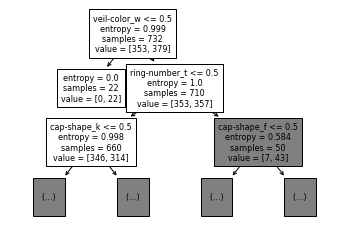

In [27]:
while predict_global > 0.9:
    if last_class:
        df = df.drop(columns=[last_class])
    df_dum = pd.get_dummies(df)
    X_train, X_test, y_train, y_test = train_test_split(df_dum,y_values, shuffle=True, stratify=y_values, test_size=0.3)
    X_valid, X_test, y_valid, y_test = train_test_split(X_test,y_test, shuffle=True, stratify=y_test, test_size=0.3)
    log_reg = linear_model.LogisticRegression(max_iter=1000) #а то ругается
    log_reg.fit(X_train, y_train)
    predict = log_reg.predict(X_valid)
    print("Точность на валидационном наборе:", metrics.accuracy_score(y_valid, predict))
    predict = log_reg.predict(X_test)
    predict_global = metrics.accuracy_score(y_test, predict)
    print("Точность на тестовом наборе:", predict_global)
    
    clf = tree.DecisionTreeClassifier(criterion='entropy')
    clf = clf.fit(X_test, y_test)
    tr = tree.plot_tree(clf,feature_names=df_dum.columns,max_depth=2, fontsize=8) 

    temp = str(tr[0])
    begin = temp.find("'") + 1
    end = temp.find("_")
    last_class = temp[begin:end]
    
    print("Удаляется", last_class)

In [28]:
print(len(df.columns), df.columns)

8 Index(['cap-shape', 'cap-surface', 'cap-color', 'gill-attachment',
       'stalk-shape', 'veil-type', 'veil-color', 'ring-number'],
      dtype='object')


In [29]:
predict_global = 1
df = pd.read_csv('C:/mushrooms.csv')
y_values, y_names = pd.factorize(df['class'])
df = df.drop(columns=['class'])
df = df.drop(columns=['odor'])
last_class = None

while predict_global > 0.9:
    
    if last_class:
        print("Удаляется", last_class)
        df = df.drop(columns=[last_class])
    df_dum = pd.get_dummies(df)
    X_train, X_test, y_train, y_test = train_test_split(df_dum,y_values, shuffle=True, stratify=y_values, test_size=0.3, random_state = 42)
    X_valid, X_test, y_valid, y_test = train_test_split(X_test,y_test, shuffle=True, stratify=y_test, test_size=0.3, random_state = 42)
    log_reg = linear_model.LogisticRegression(max_iter=1000)
    log_reg.fit(X_train, y_train)
    predict = log_reg.predict(X_valid)
    print("Точность на валидационном наборе:", metrics.accuracy_score(y_valid, predict))
    predict = log_reg.predict(X_test)
    predict_global = metrics.accuracy_score(y_test, predict)
    print("Точность на тестовом наборе:", predict_global)
    result = permutation_importance(log_reg, df_dum, y_values, n_repeats=5, random_state=42)
    #result = permutation_importance(log_reg, X_test, y_test, n_repeats=5, random_state=42)
    importance = result.importances_mean
    df_res = pd.DataFrame({'col':df_dum.columns, 'value':importance})
    sorted_vals = df_res.sort_values(by=['value'], ascending=False).head(10)
    last_class = sorted_vals.iloc[0].col
    last_class = last_class[0:last_class.find('_')]

Точность на валидационном наборе: 0.9976553341148886
Точность на тестовом наборе: 0.9986338797814208
Удаляется gill-color
Точность на валидационном наборе: 0.9958968347010551
Точность на тестовом наборе: 0.9986338797814208
Удаляется gill-size
Точность на валидационном наборе: 0.9929660023446659
Точность на тестовом наборе: 0.9877049180327869
Удаляется ring-number
Точность на валидационном наборе: 0.9830011723329426
Точность на тестовом наборе: 0.98224043715847
Удаляется ring-type
Точность на валидационном наборе: 0.9771395076201641
Точность на тестовом наборе: 0.9795081967213115
Удаляется spore-print-color
Точность на валидационном наборе: 0.977725674091442
Точность на тестовом наборе: 0.9795081967213115
Удаляется stalk-root
Точность на валидационном наборе: 0.9660023446658851
Точность на тестовом наборе: 0.9685792349726776
Удаляется population
Точность на валидационном наборе: 0.958968347010551
Точность на тестовом наборе: 0.9508196721311475
Удаляется gill-spacing
Точность на валидаци

In [30]:
print(len(df.columns), df.columns)

10 Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'gill-attachment',
       'stalk-shape', 'stalk-color-above-ring', 'stalk-color-below-ring',
       'veil-type', 'veil-color'],
      dtype='object')


Результаты интересные.  
Продолжаем анализ.  
Возьмём последний датасет (где 10 признаков) и натренируем его на данных в разных комбинациях (при помощи shuffle = True).  


In [31]:
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(df_dum,y_values, shuffle=True, stratify=y_values, test_size=0.3, random_state=42)
    X_valid, X_test, y_valid, y_test = train_test_split(X_test,y_test, shuffle=True, stratify=y_test, test_size=0.3, random_state=42)

    log_reg = linear_model.LogisticRegression(max_iter=1000)
    log_reg.fit(X_train, y_train)
    predict = log_reg.predict(X_valid)
    print("Точность на валидационном наборе:", metrics.accuracy_score(y_valid, predict))
    predict = log_reg.predict(X_test)
    predict_global = metrics.accuracy_score(y_test, predict)
    print("Точность на тестовом наборе:", predict_global)

Точность на валидационном наборе: 0.8599062133645955
Точность на тестовом наборе: 0.8688524590163934
Точность на валидационном наборе: 0.8599062133645955
Точность на тестовом наборе: 0.8688524590163934
Точность на валидационном наборе: 0.8599062133645955
Точность на тестовом наборе: 0.8688524590163934
Точность на валидационном наборе: 0.8599062133645955
Точность на тестовом наборе: 0.8688524590163934
Точность на валидационном наборе: 0.8599062133645955
Точность на тестовом наборе: 0.8688524590163934
Точность на валидационном наборе: 0.8599062133645955
Точность на тестовом наборе: 0.8688524590163934
Точность на валидационном наборе: 0.8599062133645955
Точность на тестовом наборе: 0.8688524590163934
Точность на валидационном наборе: 0.8599062133645955
Точность на тестовом наборе: 0.8688524590163934
Точность на валидационном наборе: 0.8599062133645955
Точность на тестовом наборе: 0.8688524590163934
Точность на валидационном наборе: 0.8599062133645955
Точность на тестовом наборе: 0.8688524

Временный добив через рандом форест

In [32]:
'''
df = pd.read_csv('C:/mushrooms.csv')
df = df.drop(columns=['odor'])
y_values, y_names = pd.factorize(df['class'])
df = df.drop(columns=['class'])
df_dum = pd.get_dummies(df)
'''

"\ndf = pd.read_csv('C:/mushrooms.csv')\ndf = df.drop(columns=['odor'])\ny_values, y_names = pd.factorize(df['class'])\ndf = df.drop(columns=['class'])\ndf_dum = pd.get_dummies(df)\n"

In [33]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(df_dum,y_values, shuffle=True, stratify=y_values, test_size=0.3, random_state = 42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test,y_test, shuffle=True, stratify=y_test, test_size=0.3, random_state = 42)

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [34]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [35]:
display(rf.score(X_train, y_train))

0.8825342798944464

In [36]:
predictions = rf.predict(X_valid)
display(rf.score(X_valid, y_valid))

0.874358450930906

In [37]:
predictions = rf.predict(X_test)
display(rf.score(X_test, y_test))

0.8667783291455852

И для 40

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df_dum,y_values, shuffle=True, stratify=y_values, test_size=0.3, random_state = 40)
X_valid, X_test, y_valid, y_test = train_test_split(X_test,y_test, shuffle=True, stratify=y_test, test_size=0.3, random_state = 40)

rf = RandomForestRegressor(n_estimators = 1000, random_state = 40)
rf.fit(X_train, y_train)
display(rf.score(X_train, y_train))
predictions = rf.predict(X_valid)
display(rf.score(X_valid, y_valid))
predictions = rf.predict(X_test)
display(rf.score(X_test, y_test))

0.88328280797458

0.8614644747116532

0.8972406894276085

Вопросов больше, чем ответов

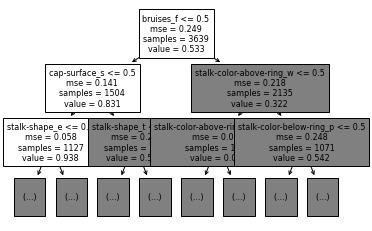

In [39]:
from sklearn import tree
import pydot

tree1 = rf.estimators_[123]

tr = tree.plot_tree(tree1,feature_names=df_dum.columns,max_depth=2, fontsize=8) 

И как эксперимент в будущее, можно попробовать поискать оптимальные параметры  
Выборка параметров небольшая, т.к. долго считается

In [40]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {'bootstrap': [True, False],
               'max_depth': [1,2,3,4,None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2,3,5,10]
              }


In [41]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, verbose=2, random_state=40)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True, total=   2.6s
[CV] min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV]  min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True, total=   2.5s
[CV] min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True 
[CV]  min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True, total=   2.4s
[CV] min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True 
[CV]  min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True, total=   2.5s
[CV] min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True 
[CV]  min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True, total=   2.6s
[CV] min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False 
[CV]  min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False, total=   6.6s
[CV] min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=4,

[CV]  min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   3.5s
[CV] min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   3.5s
[CV] min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   3.4s
[CV] min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   3.5s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   6.3s
[CV] min_samples_split=5, min_samples_leaf=2,

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.8min finished


[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   6.2s


RandomizedSearchCV(estimator=RandomForestRegressor(n_estimators=1000,
                                                   random_state=40),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 2, 3, 4, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 5, 10]},
                   random_state=40, verbose=2)

In [42]:
display(rf_random.score(X_train, y_train))

0.8817888073756693

In [43]:
display(rf_random.score(X_valid, y_valid))

0.8615250884422276

In [44]:
display(rf_random.score(X_test, y_test))

0.8950916092863456

Не то чтобы прям и лучше (возможно, ограниченность параметров дала о себе знать)